## $$\color{red}{\text{Nima Modirkiasaraee - Q1 (Interpretability of tabular data)}}$$
## $$\color{red}{\text{810102339}}$$


### Import necessary libraries 

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, classification_report
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from lime.lime_tabular import LimeTabularExplainer
import shap
import re
import warnings
warnings.filterwarnings('ignore')

## Part1: Loading the dataset and training the model

### Loading the dataset and exploratory data analysis

In [2]:
# Read the Diabetes dataset
df = pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

C:\Users\Sazgar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Sazgar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Sazgar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Sazgar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tig

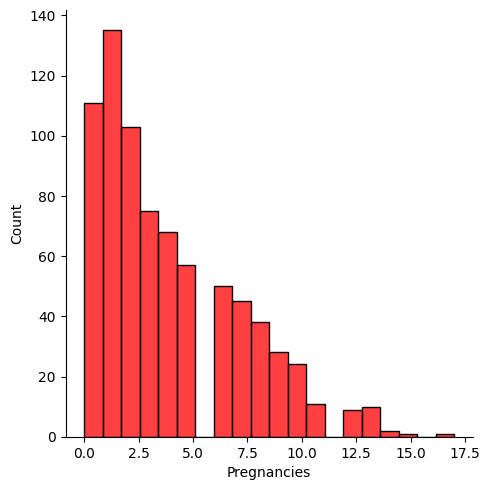

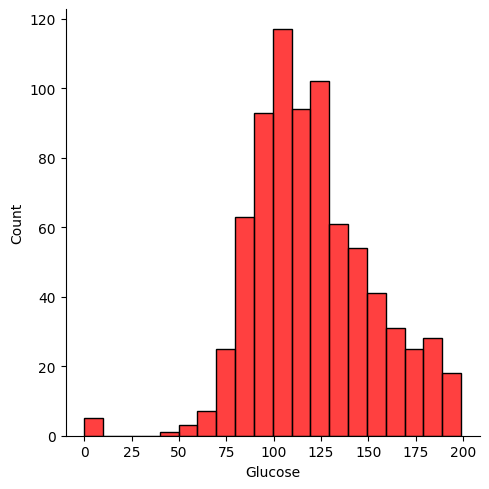

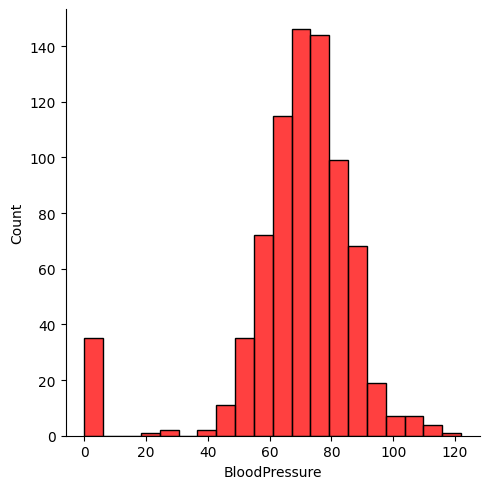

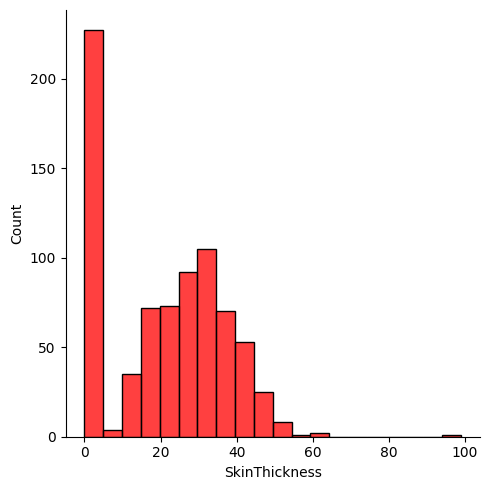

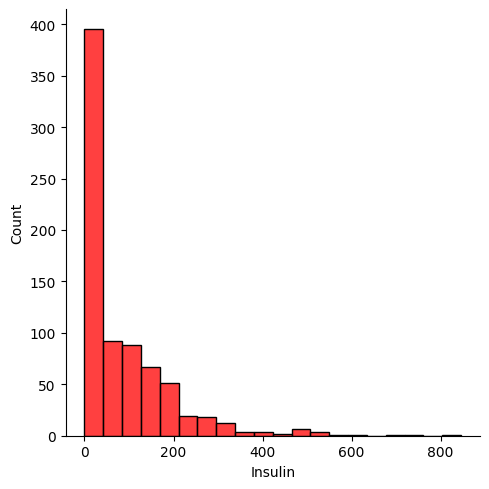

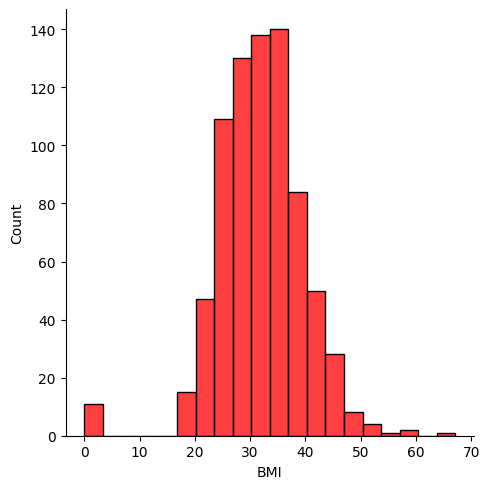

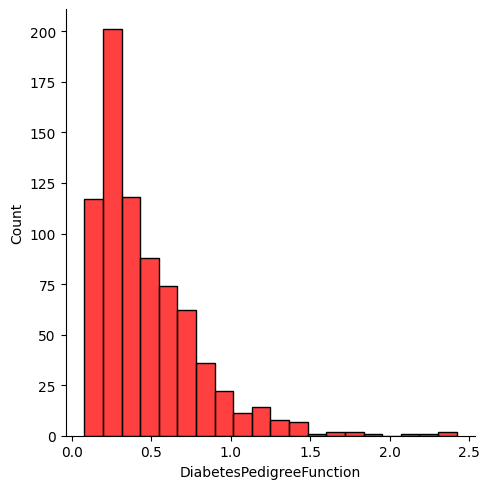

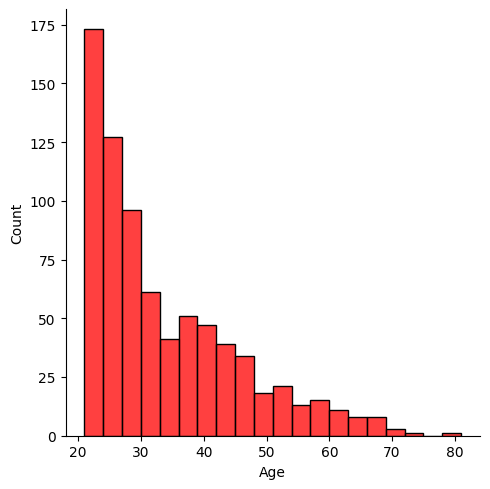

In [76]:
sns.displot(df.Pregnancies, bins=20, color="red")
sns.displot(df.Glucose, bins=20, color="red")
sns.displot(df.BloodPressure, bins=20, color="red")
sns.displot(df.SkinThickness, bins=20, color="red")
sns.displot(df.Insulin, bins=20, color="red")
sns.displot(df.BMI, bins=20, color="red")
sns.displot(df.DiabetesPedigreeFunction, bins=20, color="red")
sns.displot(df.Age, bins=20, color="red")

In [20]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

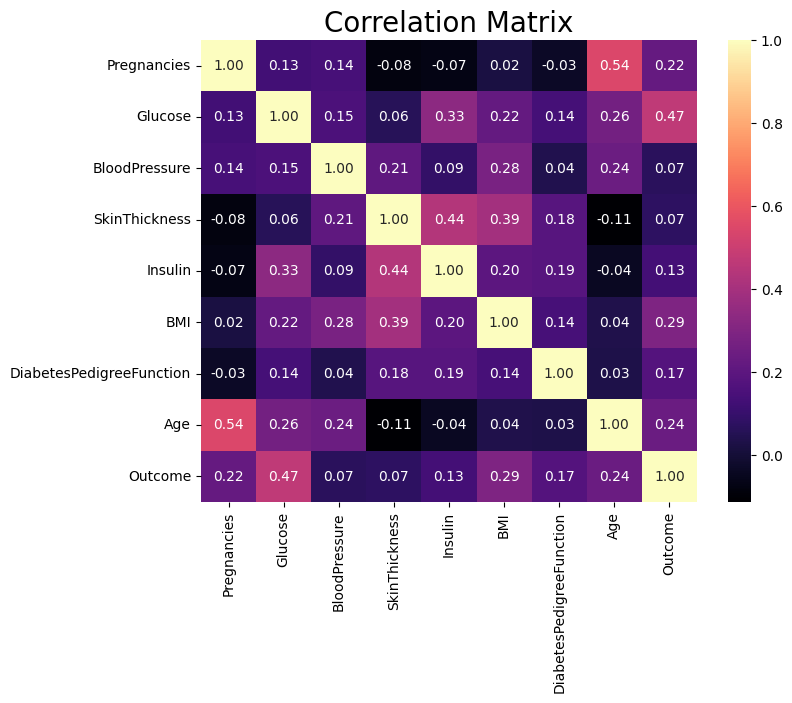

In [26]:
f,ax = plt.subplots(figsize=[8,6])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

C:\Users\Sazgar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


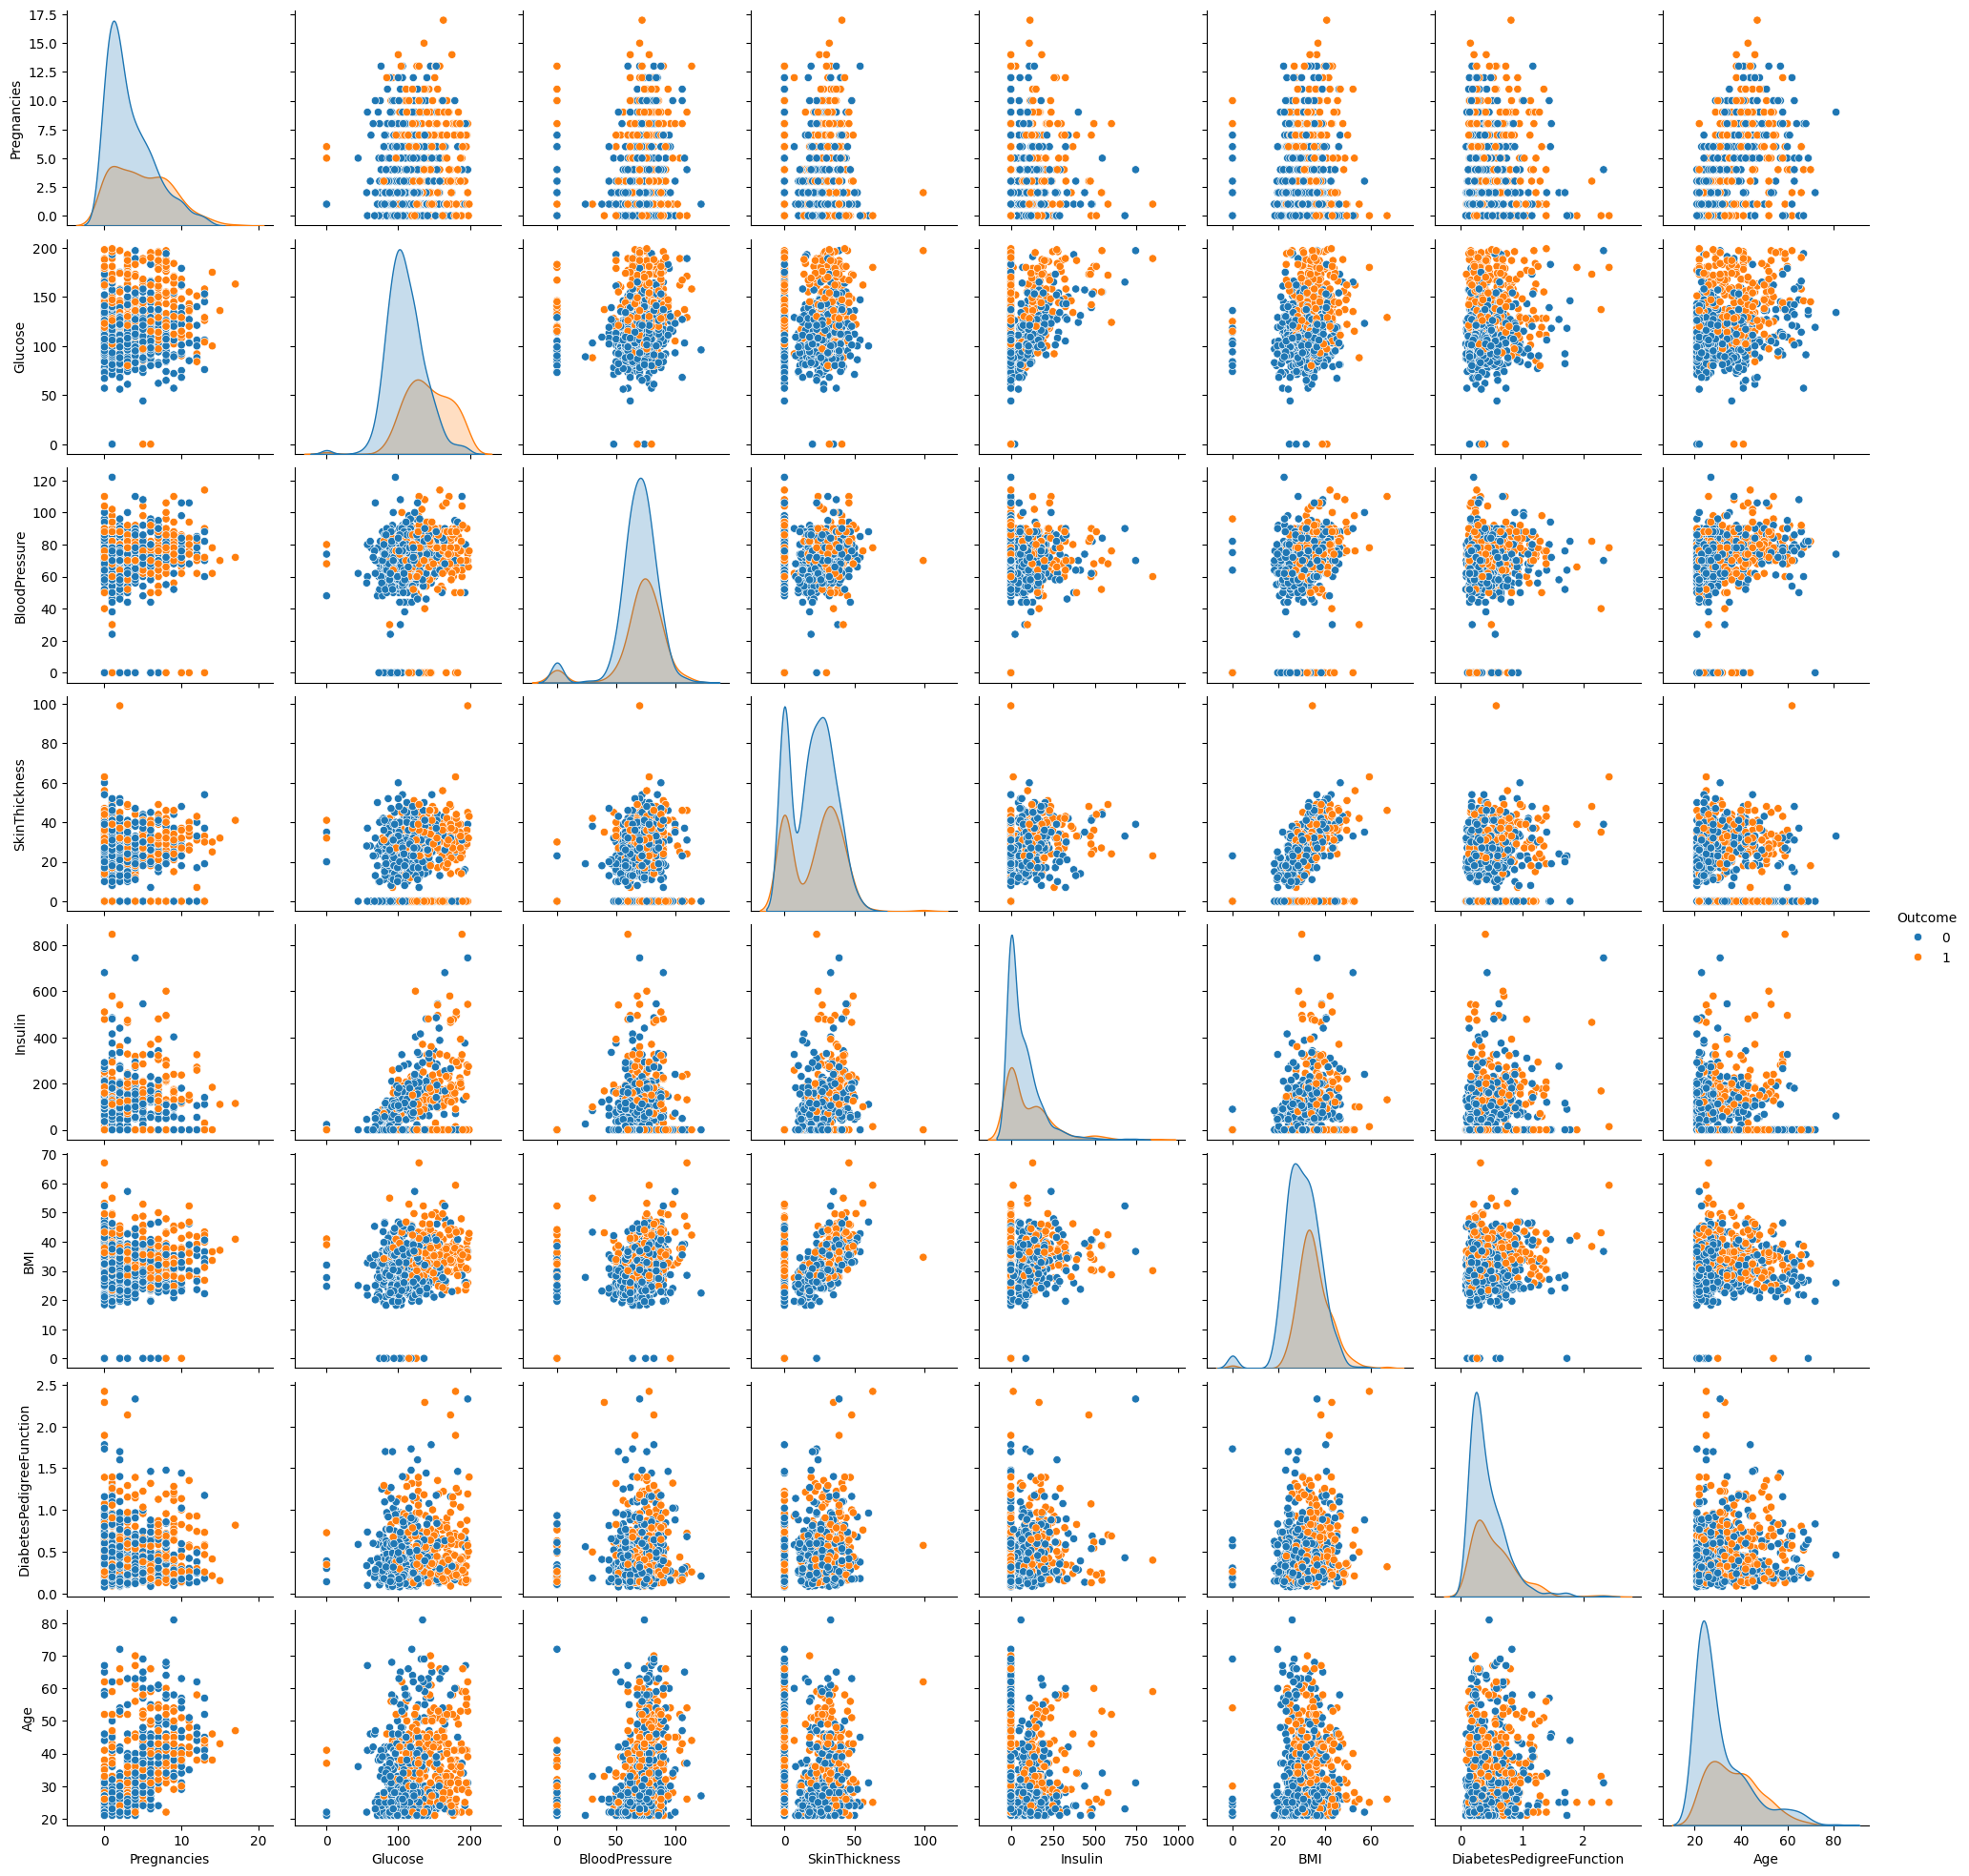

In [28]:
sns.pairplot(df, hue="Outcome")
plt.show()

In [9]:
df.groupby('Outcome')[df.columns[:-1]].mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

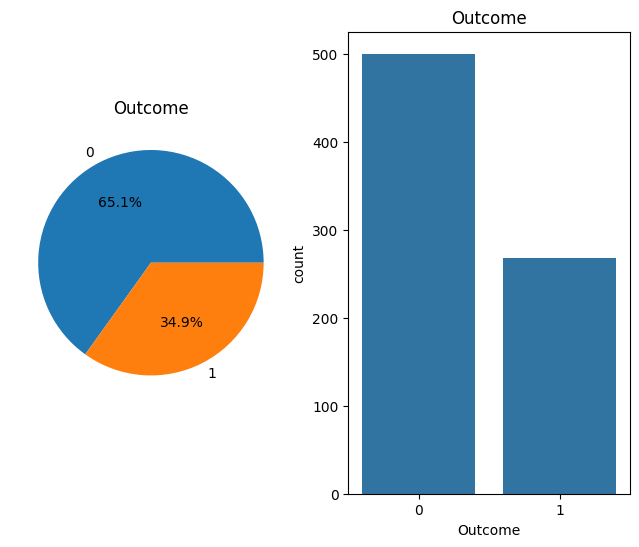

In [69]:
f,ax = plt.subplots(1,2, figsize=(8,6))
df['Outcome'].value_counts().plot.pie(autopct = "%1.1f%%", ax=ax[0])
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x = 'Outcome', data = df, ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

#### Analyse outliers

##### Values that deviate considerably from the general trend in the data are called outliers. Especially in linear problems, the effects of outliers are more severe. They have less impact on tree methods, but still, need to be considered. The critical point is to determine the acceptable threshold value, which are up limit and low limit. After determining the threshold value, outliers are caught based on these values


In [10]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

##### There are 2 points that call attention to the first look: "Insulin" has a high standard deviation, the quartile values are large, and the outlier is clear. "SkinThickness" quartile distribution is uneven.

<Axes: xlabel='Age'>

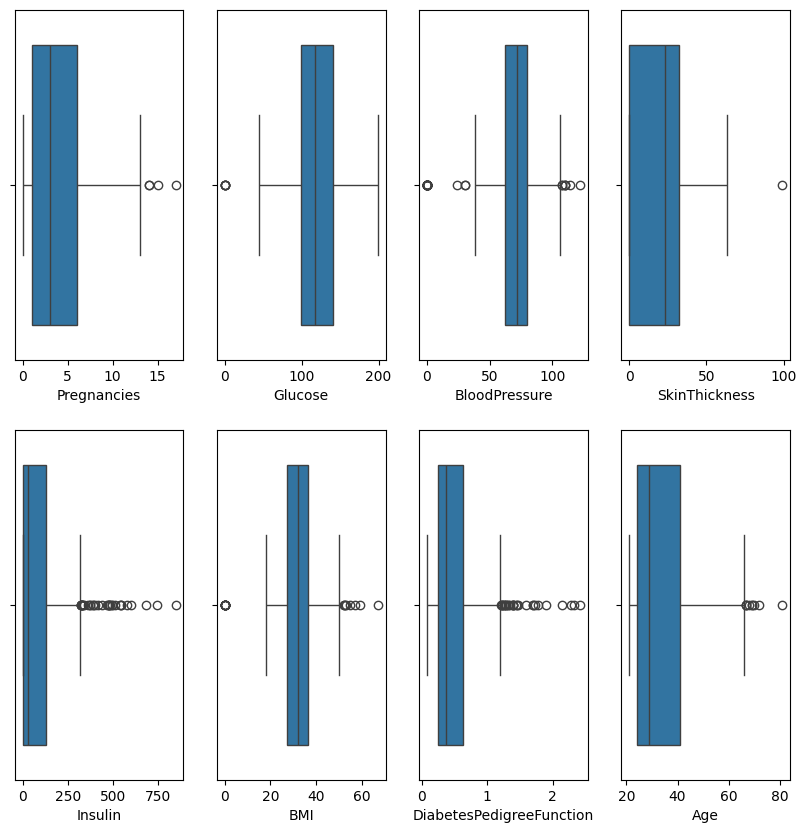

In [ ]:
f, axes = plt.subplots(2, 4, figsize = (10, 10))
sns.boxplot(x= df["Pregnancies"], ax = axes[0,0])
sns.boxplot(x= df["Glucose"], ax = axes[0,1])
sns.boxplot(x= df["BloodPressure"], ax = axes[0,2])
sns.boxplot(x= df["SkinThickness"], ax = axes[0,3])
sns.boxplot(x= df["Insulin"], ax = axes[1,0])
sns.boxplot(x= df["BMI"], ax = axes[1,1])
sns.boxplot(x= df["DiabetesPedigreeFunction"], ax = axes[1,2])
sns.boxplot(x= df["Age"], ax = axes[1,3])

In [3]:
def outlier_thresholds(dataframe,col_name,q1=0.25,q3=0.75):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquartile_range = quartile3 - quartile1
  low_limit = quartile1 - 1.5 * interquartile_range
  up_limit = quartile3 + 1.5 * interquartile_range
  return low_limit,up_limit

In [4]:
low, up = outlier_thresholds(df, "Pregnancies")
df[((df["Pregnancies"] < low) | (df["Pregnancies"] > up))]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15      136             70             32      110  37.1   
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DiabetesPedigreeFunction  Age  Outcome  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1

##### Note: We can not find outliers in this part properly because there are some missing values in the dataset

#### Analyse missing values

##### It refers to the situation of lack of observations. It can be solved in 3 ways:
##### Deleting - Value Assignment Methods (average, mode, median, etc.) - Predictive Methods (ML, statistical methods, etc.)



In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### At the first look, it seems there is no missing value but Glucose, Insulin, etc. observation units containing a value of 0 in the variables may represent the missing value. For example, a person's glucose or insulin value can not be 0. Considering this situation, let's assign the 0 values to the relevant values as NaN and then apply the operations to the missing values. Here, the pregnancy value can be 0. It is a normal situation, hence, this column will be out of NaN.

In [5]:
zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ["Pregnancies", "Outcome"])]
for col in zero_columns:
  df[col] = np.where(df[col]==0, np.nan, df[col])

In [6]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

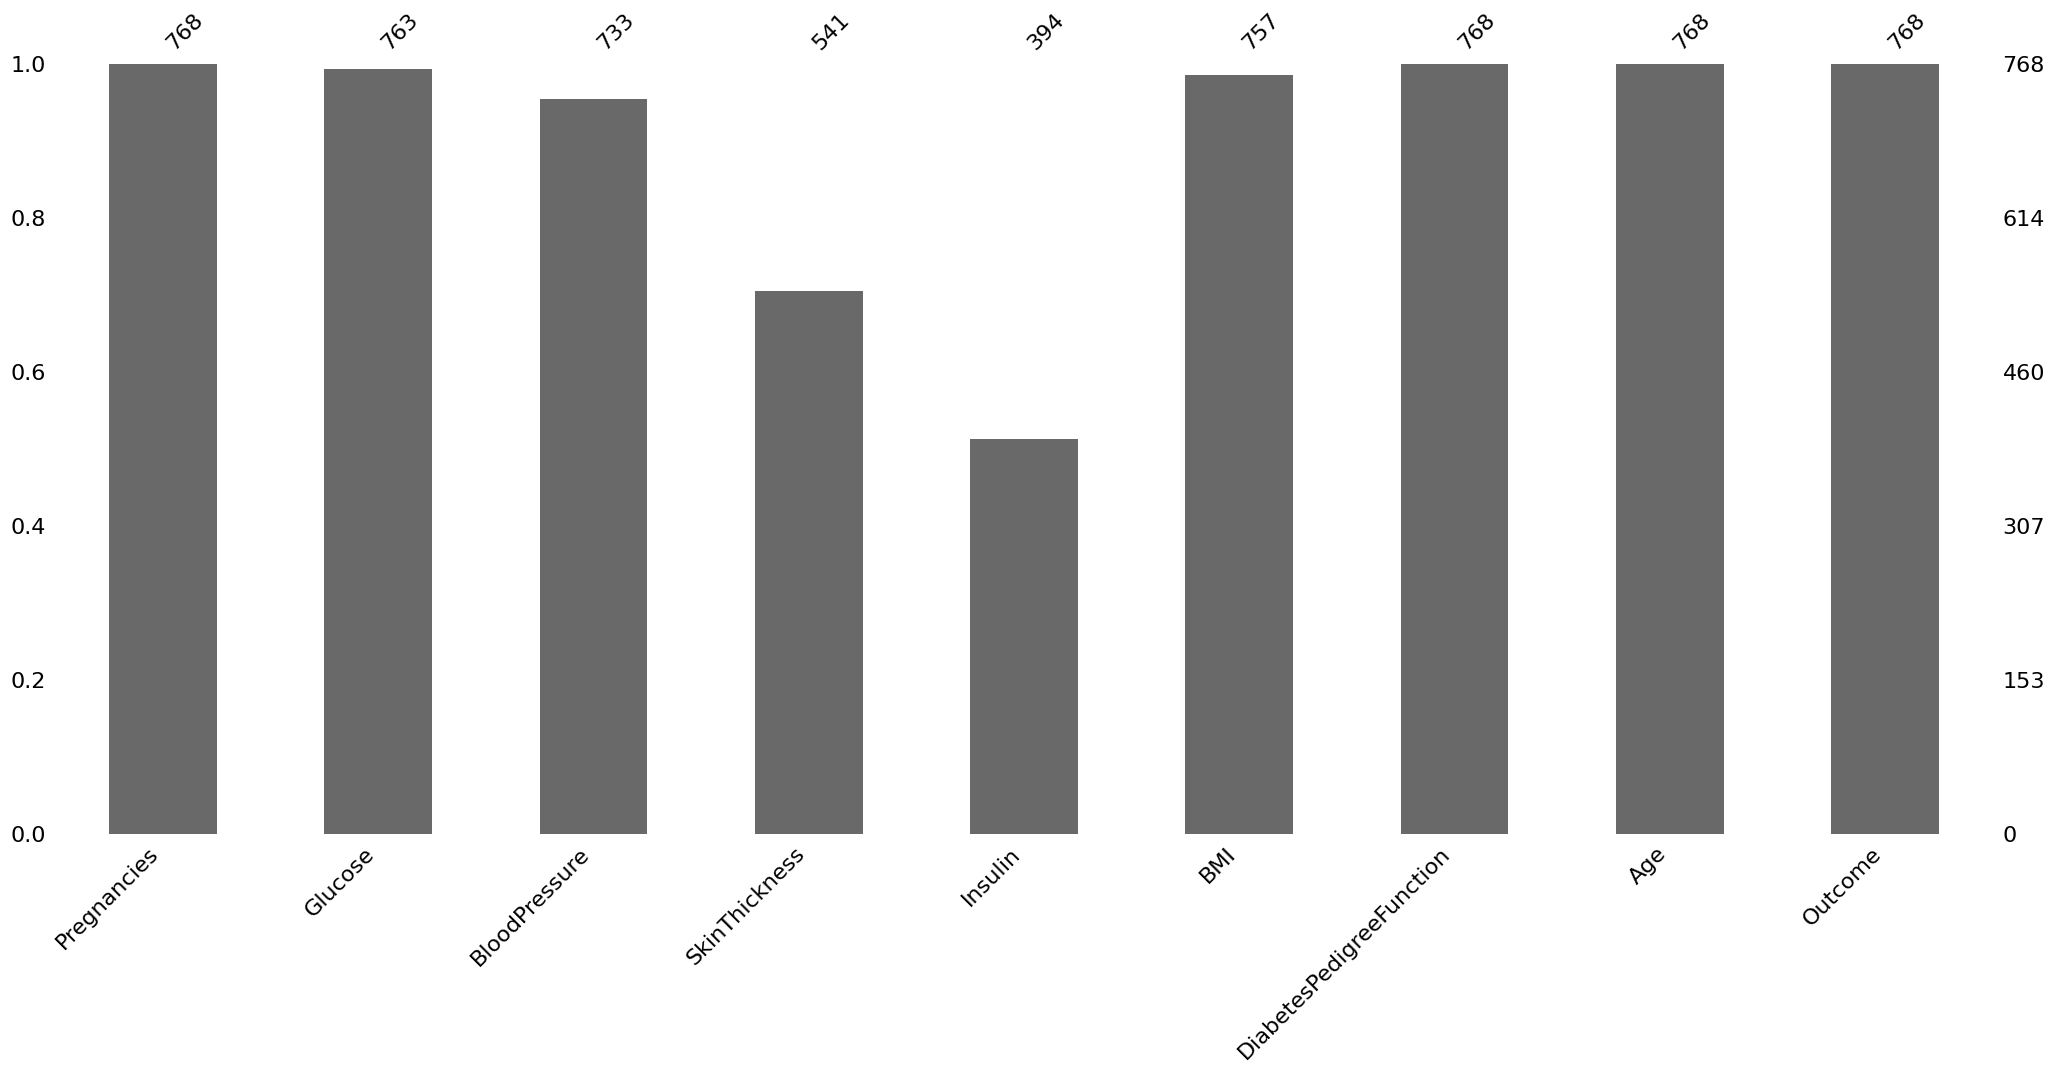

In [24]:
msno.bar(df)
plt.show()

In [6]:
def missing_values_table(dataframe, na_name=False):
    # only take missing columns
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)  # number of missing value
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False) # ratio
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])  # make table
    print(missing_df, end="\n")

    if na_name:
        return na_columns
missing_values_table(df)

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65


### Pre-processing (Solve outliers and missing values)

#### Filling the missing values
##### Here, my approach will separate the process into 2. Since two variables have many missing values, making a predictive method like KNN computer may not be logical for these. My comment is to use predict model for variables that include a low number of missing values and fill median for variables that have a high number of missing.

In [7]:
na_cols = missing_values_table(df, na_name=True) # columns that includes missing values
n_miss = df[na_cols].isnull().sum() # number of missing values on variables

# 100 as a threshold, it is open to comment
na_cols_ml = [i for i in n_miss.index if n_miss[i] < 100]
na_cols_med = [i for i in n_miss.index if n_miss[i] > 100]
print("Columns that will be applied ML model:", na_cols_ml)
print("Columns that will be filled with median:", na_cols_med)

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65
Columns that will be applied ML model: ['Glucose', 'BloodPressure', 'BMI']
Columns that will be filled with median: ['SkinThickness', 'Insulin']


In [8]:
df[na_cols_med] = df[na_cols_med].apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

In [9]:
scaler = MinMaxScaler()
# take only needed columns
df[na_cols_ml] = pd.DataFrame(scaler.fit_transform(df[na_cols_ml]), columns=df[na_cols_ml].columns)
# fill with KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[na_cols_ml] = pd.DataFrame(imputer.fit_transform(df[na_cols_ml]), columns=df[na_cols_ml].columns)
# from standardized to non-standardized 
df[na_cols_ml] = pd.DataFrame(scaler.inverse_transform(df[na_cols_ml]), columns=df[na_cols_ml].columns)

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Solve the outliers
##### there are 2 ways to solve this problem: IQR Method for the find outliers on univariate, and LOF Method for getting multivariate outliers.Firstly, LOF Method will be explained because it controls the variables' meaningfulness to each other and gives a few outliers. Then, IQR Method will be implemented.


##### Local Outlier Factor (LOF): Another approach is the Local Outlier Factor. It helps us to define outliers accordingly by ordering the observations based on the density at their location. The local density of a point means the neighborhoods around that point. If a point is significantly less dense than its neighbors, then that point is in a more sparse region, so there may be an outlier. The LOF method allows us to calculate a distance score based on neighborhoods.

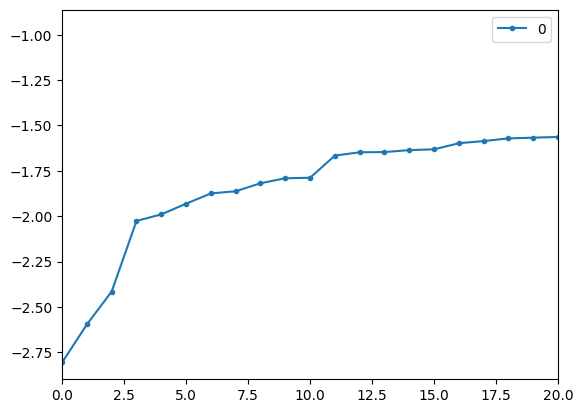

In [11]:
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)
df_scores = clf.negative_outlier_factor_
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 20], style='.-')
plt.show()

##### There are some observations and their scores, and there is the problem of where to divide these scores. The most marginal change was in the 3rd index, so this is the point where the most drastic change is defined as the threshold value. Because the lower scores(more negative values) are the worse, then a threshold has to be set and cut it.

In [12]:
th = np.sort(df_scores)[3]
df.drop(axis=0, labels=df[df_scores < th].index, inplace=True) 
df = df.reset_index(drop = True)
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
760           10    101.0           76.0           48.0    180.0  32.9   
761            2    122.0           70.0           27.0    125.0  36.8   
762            5    121.0           72.0           23.0    112.0  26.2   
763            1    126.0           60.0           29.0    125.0  30.1   
764            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
760                     0.171   63        0  
761                     0.340   27        0  
762                     0.245   30        0  
763                     0.349   47        1  
764                     0.315   23        0  

[765 rows x 9 columns]

##### IQR: We find the thresholds on analysis using IQR calculation. Now, re-assignment with thresholds will be done. It means the outliers will be replaced with upper and lower thresholds. Why this kind of process is made is based on preventing the loss of data. Especially in the small dataset, each data is significant.

In [13]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [14]:
for col in df.columns[:-1]:
    replace_with_thresholds(df, col)

C:\Users\nimamodir\AppData\Local\Temp\ipykernel_11192\130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
C:\Users\nimamodir\AppData\Local\Temp\ipykernel_11192\130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


In [15]:
df.describe().T

count        mean        std      min      25%  \
Pregnancies               765.0    3.848366   3.345586    0.000    1.000   
Glucose                   765.0  121.417516  30.209373   44.000   99.000   
BloodPressure             765.0   72.398954  11.818643   40.000   64.000   
SkinThickness             765.0   28.838562   7.421166   14.500   25.000   
Insulin                   765.0  124.745098   6.918495  114.500  122.000   
BMI                       765.0   32.375438   6.656662   18.200   27.500   
DiabetesPedigreeFunction  765.0    0.457892   0.284904    0.078    0.243   
Age                       765.0   33.139216  11.562964   21.000   24.000   
Outcome                   765.0    0.346405   0.476135    0.000    0.000   

                             50%      75%       max  
Pregnancies                 3.00    6.000   13.5000  
Glucose                   117.00  140.000  199.0000  
BloodPressure              72.00   80.000  104.0000  
SkinThickness              29.00   32.000   42.5000  
Insulin                   125.00  127.000  134.5000  
BMI                        32.30   36.600   50.2500  
DiabetesPedigreeFunction    0.37    0.626    1.2005  
Age                        29.00   41.000   66.5000  
Outcome                     0.00    1.000    1.0000

### Scaling and splitting the dataset

In [16]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
temp = pd.DataFrame(X)
temp.columns = df.columns[:-1]
df_scaled = pd.concat([temp, df['Outcome']], axis = 1)
df_scaled

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.643547  0.880517      -0.033778       0.830795  0.036868  0.184081   
1      -0.851937 -1.206293      -0.541783       0.021768  0.036868 -0.868185   
2       1.241741  2.039856      -0.711118       0.021768  0.036868 -1.364254   
3      -0.851937 -1.073797      -0.541783      -0.787259 -1.481796 -0.642700   
4      -1.151034  0.516154      -2.743137       0.830795  1.410897  1.612156   
..           ...       ...            ...            ...       ...       ...   
760     1.839934 -0.676309       0.304891       1.842079  1.410897  0.078854   
761    -0.552840  0.019294      -0.203113      -0.247908  0.036868  0.665117   
762     0.344450 -0.013830      -0.033778      -0.787259 -1.481796 -0.928315   
763    -0.851937  0.151790      -1.049788       0.021768  0.036868 -0.342052   
764    -0.851937 -0.941301      -0.203113       0.291444  0.036868 -0.296955   

     DiabetesPedigreeFunction       Age  Outcome  
0                    0.593951  1.459126        1  
1                   -0.375430 -0.185127        0  
2                    0.752003 -0.098587        1  
3                   -1.021684 -1.050523        0  
4                    2.608227 -0.012048        1  
..                        ...       ...      ...  
760                 -1.007635  2.584140        0  
761                 -0.414064 -0.531285        0  
762                 -0.747728 -0.271666        0  
763                 -0.382454  1.199507        1  
764                 -0.501871 -0.877444        0  

[765 rows x 9 columns]

In [18]:
# Splitting the DataFrame into train and remaining (test + validation)
train, remaining = train_test_split(df_scaled, train_size=0.7, stratify=df_scaled['Outcome'], random_state=42)

# Splitting the remaining DataFrame into validation and test
validation, test = train_test_split(remaining, test_size=(2/3), stratify=remaining['Outcome'], random_state=42)

# Now you have train (70%), validation (10%), and test (20%) sets
print(f"Train size: {len(train)}")
print(f"Validation size: {len(validation)}")
print(f"Test size: {len(test)}")

Train size: 535
Validation size: 76
Test size: 154


### Training and evalutaion the model

In [19]:
class DiabetesNN(nn.Module):
    def __init__(self):
        super(DiabetesNN, self).__init__()
        self.layer1 = nn.Linear(8, 100)
        self.bn1 = nn.BatchNorm1d(100)
        self.layer2 = nn.Linear(100, 50)
        self.dropout = nn.Dropout(0.2)
        self.layer3 = nn.Linear(50, 50)
        self.layer4 = nn.Linear(50, 20)
        self.layer5 = nn.Linear(20, 1)
    
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.bn1(x)
        x = F.relu(self.layer2(x))
        x = self.dropout(x)
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = torch.sigmoid(self.layer5(x))
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DiabetesNN().to(device)

In [20]:
def prepare_dataset(df):
    X = torch.tensor(df.iloc[:, :-1].values, dtype=torch.float32)
    y = torch.tensor(df.iloc[:, -1].values, dtype=torch.float32).unsqueeze(1)
    return TensorDataset(X, y)

train_loader = DataLoader(prepare_dataset(train), batch_size=32, shuffle=True)
validation_loader = DataLoader(prepare_dataset(validation), batch_size=32)
test_loader = DataLoader(prepare_dataset(test), batch_size=32)

In [21]:
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [22]:
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
epochs = 30
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        predicted = outputs.round()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    
    model.eval()
    with torch.no_grad():
        val_loss, val_correct, val_total = 0, 0, 0
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_loss += loss_fn(outputs, labels).item() * inputs.size(0)
            val_predicted = outputs.round()
            val_correct += (val_predicted == labels).sum().item()
            val_total += labels.size(0)
        
        val_loss /= len(validation_loader.dataset)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

    print(f'Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

Epoch 1: Train Loss: 0.5659, Train Acc: 0.7178, Val Loss: 0.5465, Val Acc: 0.7237
Epoch 2: Train Loss: 0.4981, Train Acc: 0.7794, Val Loss: 0.5017, Val Acc: 0.7368
Epoch 3: Train Loss: 0.4567, Train Acc: 0.7832, Val Loss: 0.5288, Val Acc: 0.8026
Epoch 4: Train Loss: 0.4245, Train Acc: 0.7888, Val Loss: 0.5366, Val Acc: 0.7237
Epoch 5: Train Loss: 0.4197, Train Acc: 0.7981, Val Loss: 0.6605, Val Acc: 0.7500
Epoch 6: Train Loss: 0.4174, Train Acc: 0.8037, Val Loss: 0.6175, Val Acc: 0.7368
Epoch 7: Train Loss: 0.4083, Train Acc: 0.8037, Val Loss: 0.6604, Val Acc: 0.7763
Epoch 8: Train Loss: 0.3790, Train Acc: 0.8168, Val Loss: 0.6975, Val Acc: 0.7237
Epoch 9: Train Loss: 0.4053, Train Acc: 0.8168, Val Loss: 0.6628, Val Acc: 0.7500
Epoch 10: Train Loss: 0.3863, Train Acc: 0.8224, Val Loss: 0.7763, Val Acc: 0.7895
Epoch 11: Train Loss: 0.3762, Train Acc: 0.8336, Val Loss: 0.5825, Val Acc: 0.7500
Epoch 12: Train Loss: 0.3878, Train Acc: 0.8299, Val Loss: 0.9883, Val Acc: 0.7763
Epoch 13: Tra

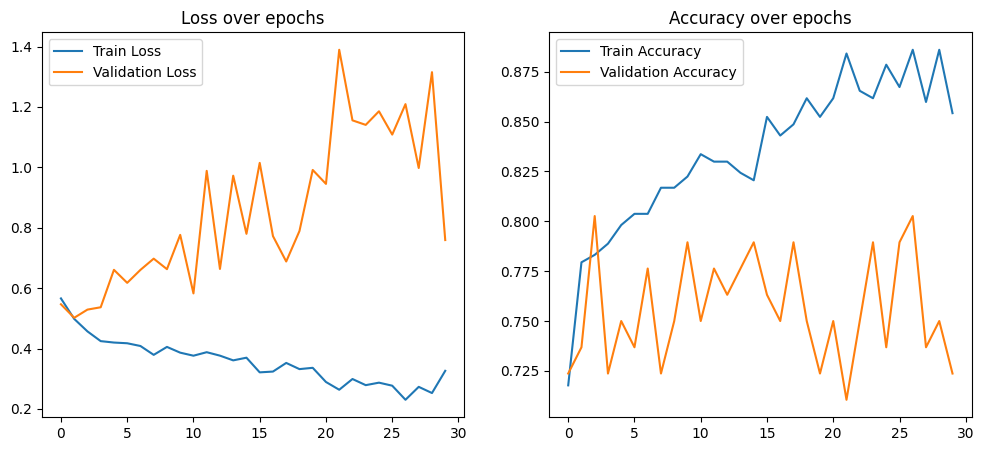

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()

In [168]:
model.eval()
test_y_true, test_y_pred = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        predicted = outputs.round()
        test_y_true.extend(labels.cpu().numpy())
        test_y_pred.extend(predicted.cpu().numpy())

test_y_true = np.array(test_y_true)
test_y_pred = np.array(test_y_pred)
accuracy = accuracy_score(test_y_true, test_y_pred)
recall = recall_score(test_y_true, test_y_pred)
f1 = f1_score(test_y_true, test_y_pred)
cm = confusion_matrix(test_y_true, test_y_pred)
print(f'Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(test_y_true, test_y_pred))

Accuracy: 0.7727, Recall: 0.6852, F1 Score: 0.6789
Confusion Matrix:
[[82 18]
 [17 37]]
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       100
         1.0       0.67      0.69      0.68        54

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



## Part2: Model Interpretation

### Lime method

Analysis of Sample 10


c:\Users\nimamodir\AppData\Local\anaconda3\envs\QubyAi\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\nimamodir\AppData\Local\anaconda3\envs\QubyAi\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\nimamodir\AppData\Local\anaconda3\envs\QubyAi\lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always 

<Figure size 640x480 with 0 Axes>

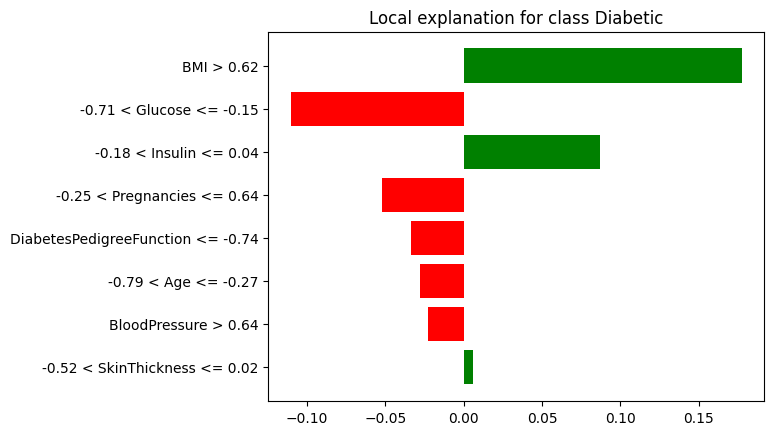

Analysis of Sample 484


c:\Users\nimamodir\AppData\Local\anaconda3\envs\QubyAi\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\nimamodir\AppData\Local\anaconda3\envs\QubyAi\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\nimamodir\AppData\Local\anaconda3\envs\QubyAi\lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always 

<Figure size 640x480 with 0 Axes>

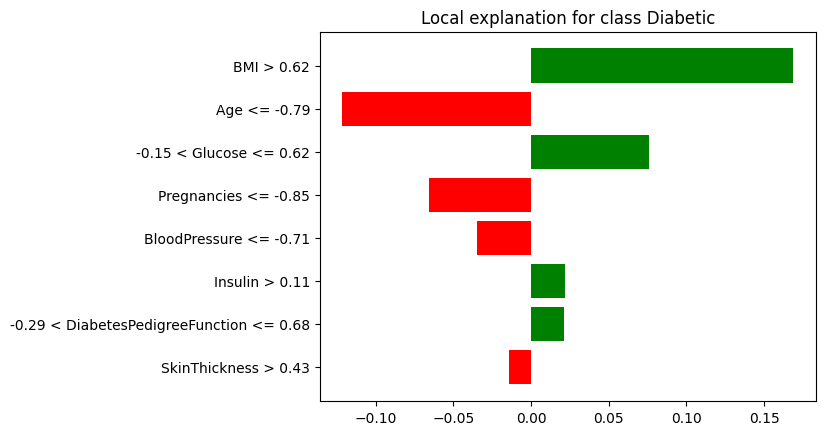

Analysis of Sample 764


c:\Users\nimamodir\AppData\Local\anaconda3\envs\QubyAi\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\nimamodir\AppData\Local\anaconda3\envs\QubyAi\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\nimamodir\AppData\Local\anaconda3\envs\QubyAi\lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always 

<Figure size 640x480 with 0 Axes>

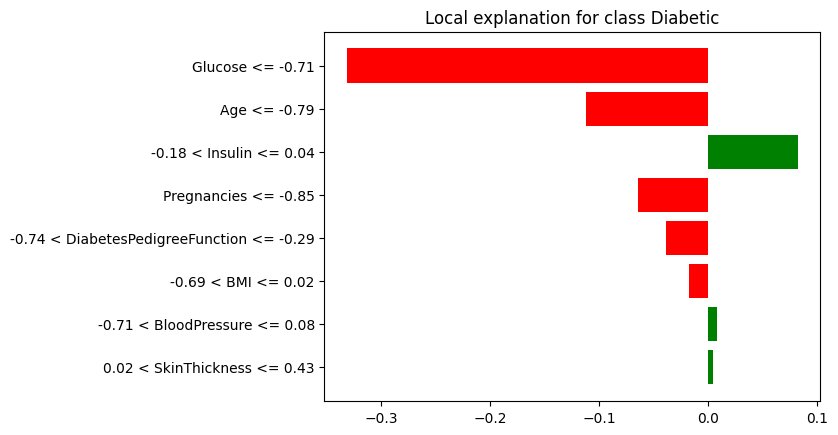

In [258]:
def predict_proba(data):
    # Convert the numpy array data to a torch tensor
    model.eval()
    with torch.no_grad():
        data = torch.tensor(data).float().to(device)
        predictions = model(data)
        predictions = predictions.cpu().numpy()  # Move the predictions back to CPU and convert to numpy
    return np.hstack((1-predictions, predictions))

explainer = LimeTabularExplainer(
    training_data=np.array(train.iloc[:, :-1]), 
    mode='classification',
    feature_names=list(train.columns[:-1]),
    class_names=['Non-Diabetic', 'Diabetic'],
    random_state=42
)

for index in range(3):
    exp = explainer.explain_instance(test.iloc[index, :-1], predict_proba, num_features=len(train.columns) - 1)
    print(f"Analysis of Sample {test.index[index]}")
    exp.show_in_notebook(show_table=True, show_all=False)
    plt.figure()
    exp.as_pyplot_figure()
    plt.show()

### Shap method

Using 535 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/3 [00:00<?, ?it/s]

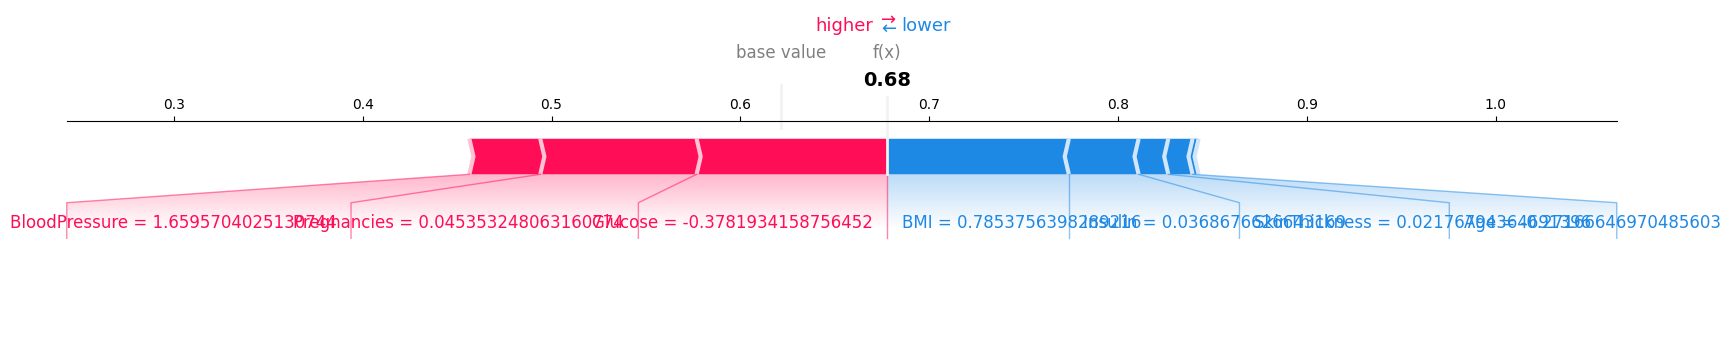

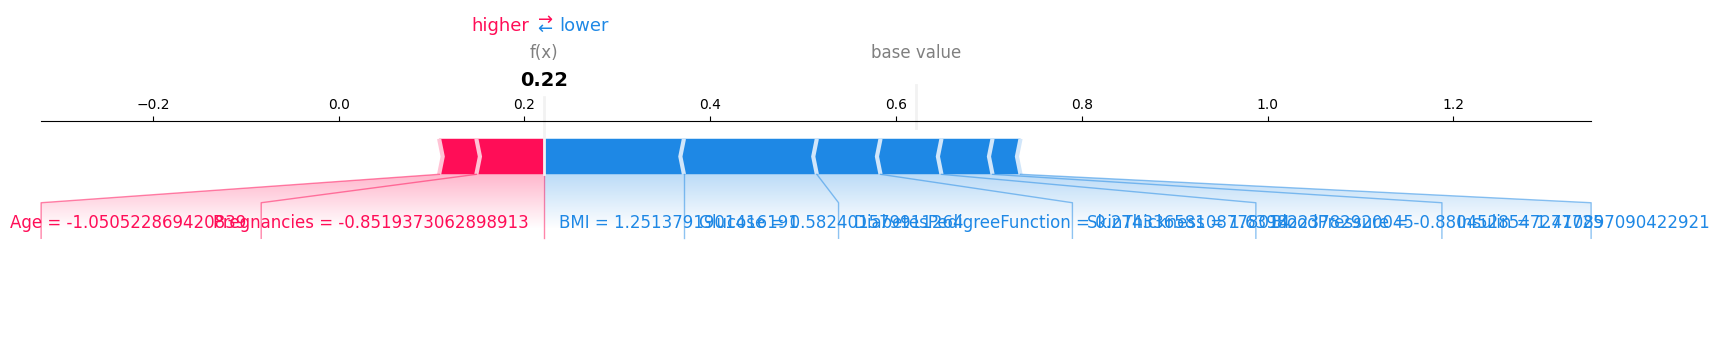

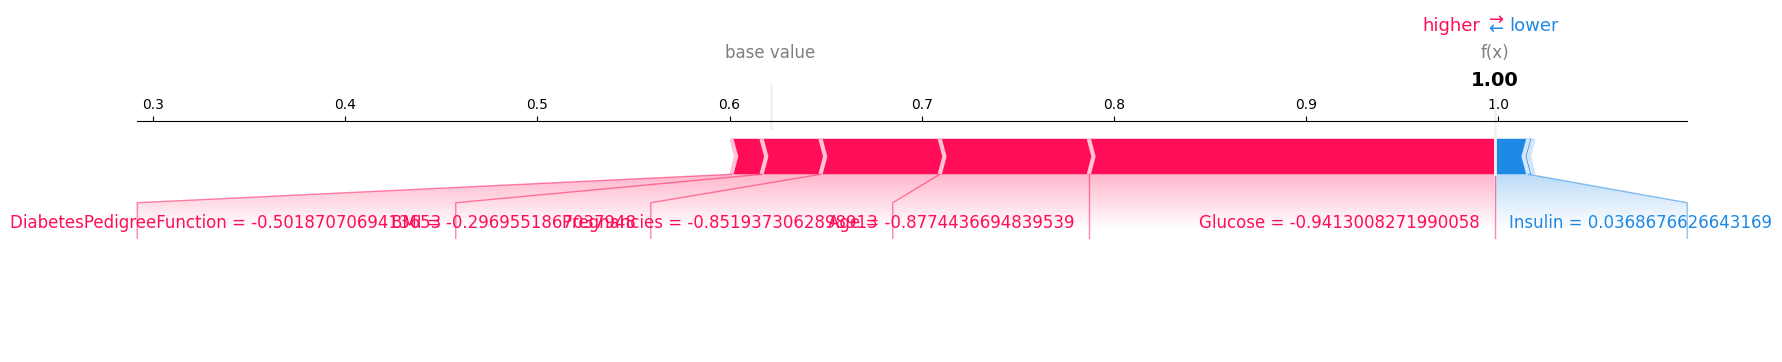

In [308]:
explainer = shap.KernelExplainer(predict_proba, train.iloc[:, :-1])
shap_values = explainer.shap_values(test.iloc[0:3, :-1])
for i in range(3):
    shap.force_plot(explainer.expected_value[0], shap_values[i][:, 0], test.iloc[i, :-1], feature_names=train.columns[:-1], matplotlib = True, show = False)
    plt.show()

### Determining features importance for whole test data using Shap method

Using 535 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/154 [00:00<?, ?it/s]

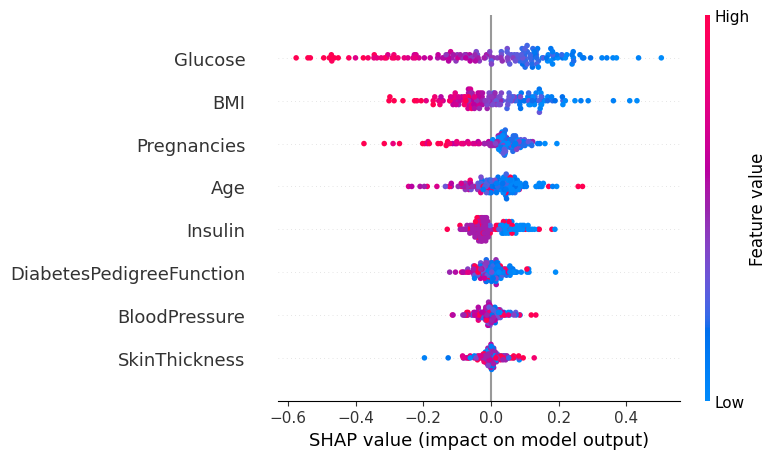

In [331]:
explainer = shap.KernelExplainer(predict_proba, train.iloc[:, :-1])
shap_values = explainer.shap_values(test.iloc[:, :-1])
shap.summary_plot(shap_values[:, :, 0], test.iloc[:, :-1], feature_names=train.columns[:-1])

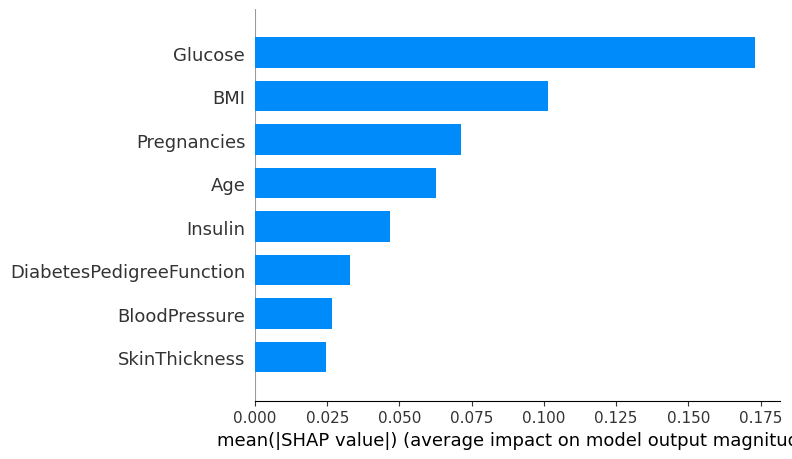

In [333]:
shap.summary_plot(shap_values[:, :, 0], test.iloc[:, :-1], feature_names=train.columns[:-1], plot_type = "bar")

### Determining features importance for whole test data using Lime method

In [44]:
def predict_proba(data):
    model.eval()
    with torch.no_grad():
        data = torch.tensor(data).float().to(device)
        predictions = model(data)
        predictions = predictions.cpu().numpy()
    return np.hstack((1 - predictions, predictions))

def extract_feature_name(condition):
    temp = condition.split()
    if (len(temp) == 3):
        return temp[0]
    elif (len(temp) == 5):
        return temp[2]
    return feature

# Initialize the explainer
explainer = LimeTabularExplainer(
    training_data=np.array(train.iloc[:, :-1]), 
    mode='classification',
    feature_names=list(train.columns[:-1]),
    class_names=['Non-Diabetic', 'Diabetic'],
    random_state=42
)

# Initialize a dictionary to store feature importances
feature_importances = {feature: 0 for feature in train.columns[:-1]}

# Loop over all test instances
for index in range(len(test)):
    exp = explainer.explain_instance(test.iloc[index, :-1], predict_proba, num_features=len(train.columns) - 1)
    for condition, importance in exp.as_list():
        feature_importances[extract_feature_name(condition)] += abs(importance)

total_explanations = len(test)
for feature in feature_importances:
    feature_importances[feature] /= total_explanations

# Print the normalized feature importances
print("Normalized Feature Importances:")
for feature, importance in feature_importances.items():
    print(f"{feature}: {importance}")

Normalized Feature Importances:
Pregnancies: 0.05956623440051746
Glucose: 0.1865245943908868
BloodPressure: 0.03458864261930736
SkinThickness: 0.028662653265622916
Insulin: 0.07844047628995435
BMI: 0.10826257557072554
DiabetesPedigreeFunction: 0.014881110283374943
Age: 0.04632365808933662


## Part3: NAM Method

In [76]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger

from nam.config import defaults
from nam.data import FoldedDataset
from nam.data import NAMDataset
from nam.models import NAM
from nam.models import get_num_units
from nam.trainer import LitNAM
from nam.types import Config
from nam.utils import parse_args
from nam.utils import plot_mean_feature_importance
from nam.utils import plot_nams
from nam.data import load_gallup_data, load_housing_data, load_sklearn_housing_data, load_breast_data


In [87]:
config = defaults()

In [88]:
dataset = NAMDataset(config, data_path = df_scaled, features_columns = df_scaled.columns[:-1], targets_column = df_scaled.columns[-1])

In [90]:
dataloaders = dataset.train_dataloaders()
trainloader = dataloaders[0]
validloader = dataloaders[1]

In [92]:
model = NAM(
            config=config,
            name=config.experiment_name,
            num_inputs=len(dataset[0][0]),
            num_units=get_num_units(config, dataset.features),
        )
model

NAM(
  (dropout): Dropout(p=0.1, inplace=False)
  (feature_nns): ModuleList(
    (0): FeatureNN(
      (dropout): Dropout(p=0.1, inplace=False)
      (model): ModuleList(
        (0): ExU(in_features=1, out_features=30)
        (1): Linear(in_features=30, out_features=1, bias=True)
      )
    )
    (1): FeatureNN(
      (dropout): Dropout(p=0.1, inplace=False)
      (model): ModuleList(
        (0): ExU(in_features=1, out_features=278)
        (1): Linear(in_features=278, out_features=1, bias=True)
      )
    )
    (2): FeatureNN(
      (dropout): Dropout(p=0.1, inplace=False)
      (model): ModuleList(
        (0): ExU(in_features=1, out_features=124)
        (1): Linear(in_features=124, out_features=1, bias=True)
      )
    )
    (3): FeatureNN(
      (dropout): Dropout(p=0.1, inplace=False)
      (model): ModuleList(
        (0): ExU(in_features=1, out_features=60)
        (1): Linear(in_features=60, out_features=1, bias=True)
      )
    )
    (4): FeatureNN(
      (dropout): Dr

In [96]:
tb_logger = TensorBoardLogger(save_dir=config.logdir, name=f'{model.name}', version=f'0')
litmodel = LitNAM(config, model)
trainer = pl.Trainer(logger=tb_logger, max_epochs=30)
trainer.fit(litmodel, train_dataloaders=trainloader, val_dataloaders=validloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type | Params
-------------------------------
0 | model | NAM  | 4.2 K 
-------------------------------
4.2 K     Trainable params
0         Non-trainable params
4.2 K     Total params
0.017     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.


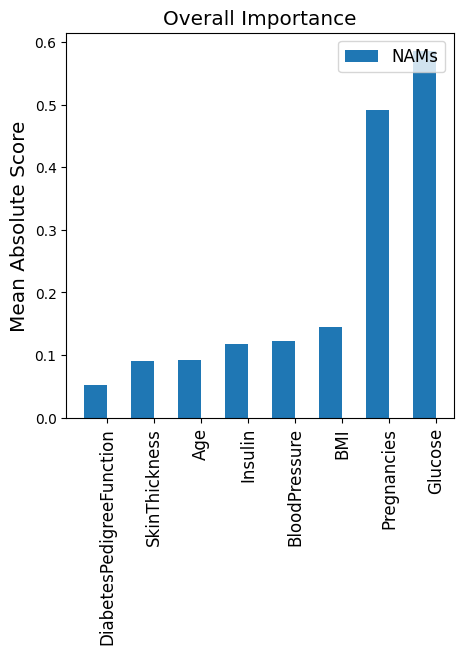

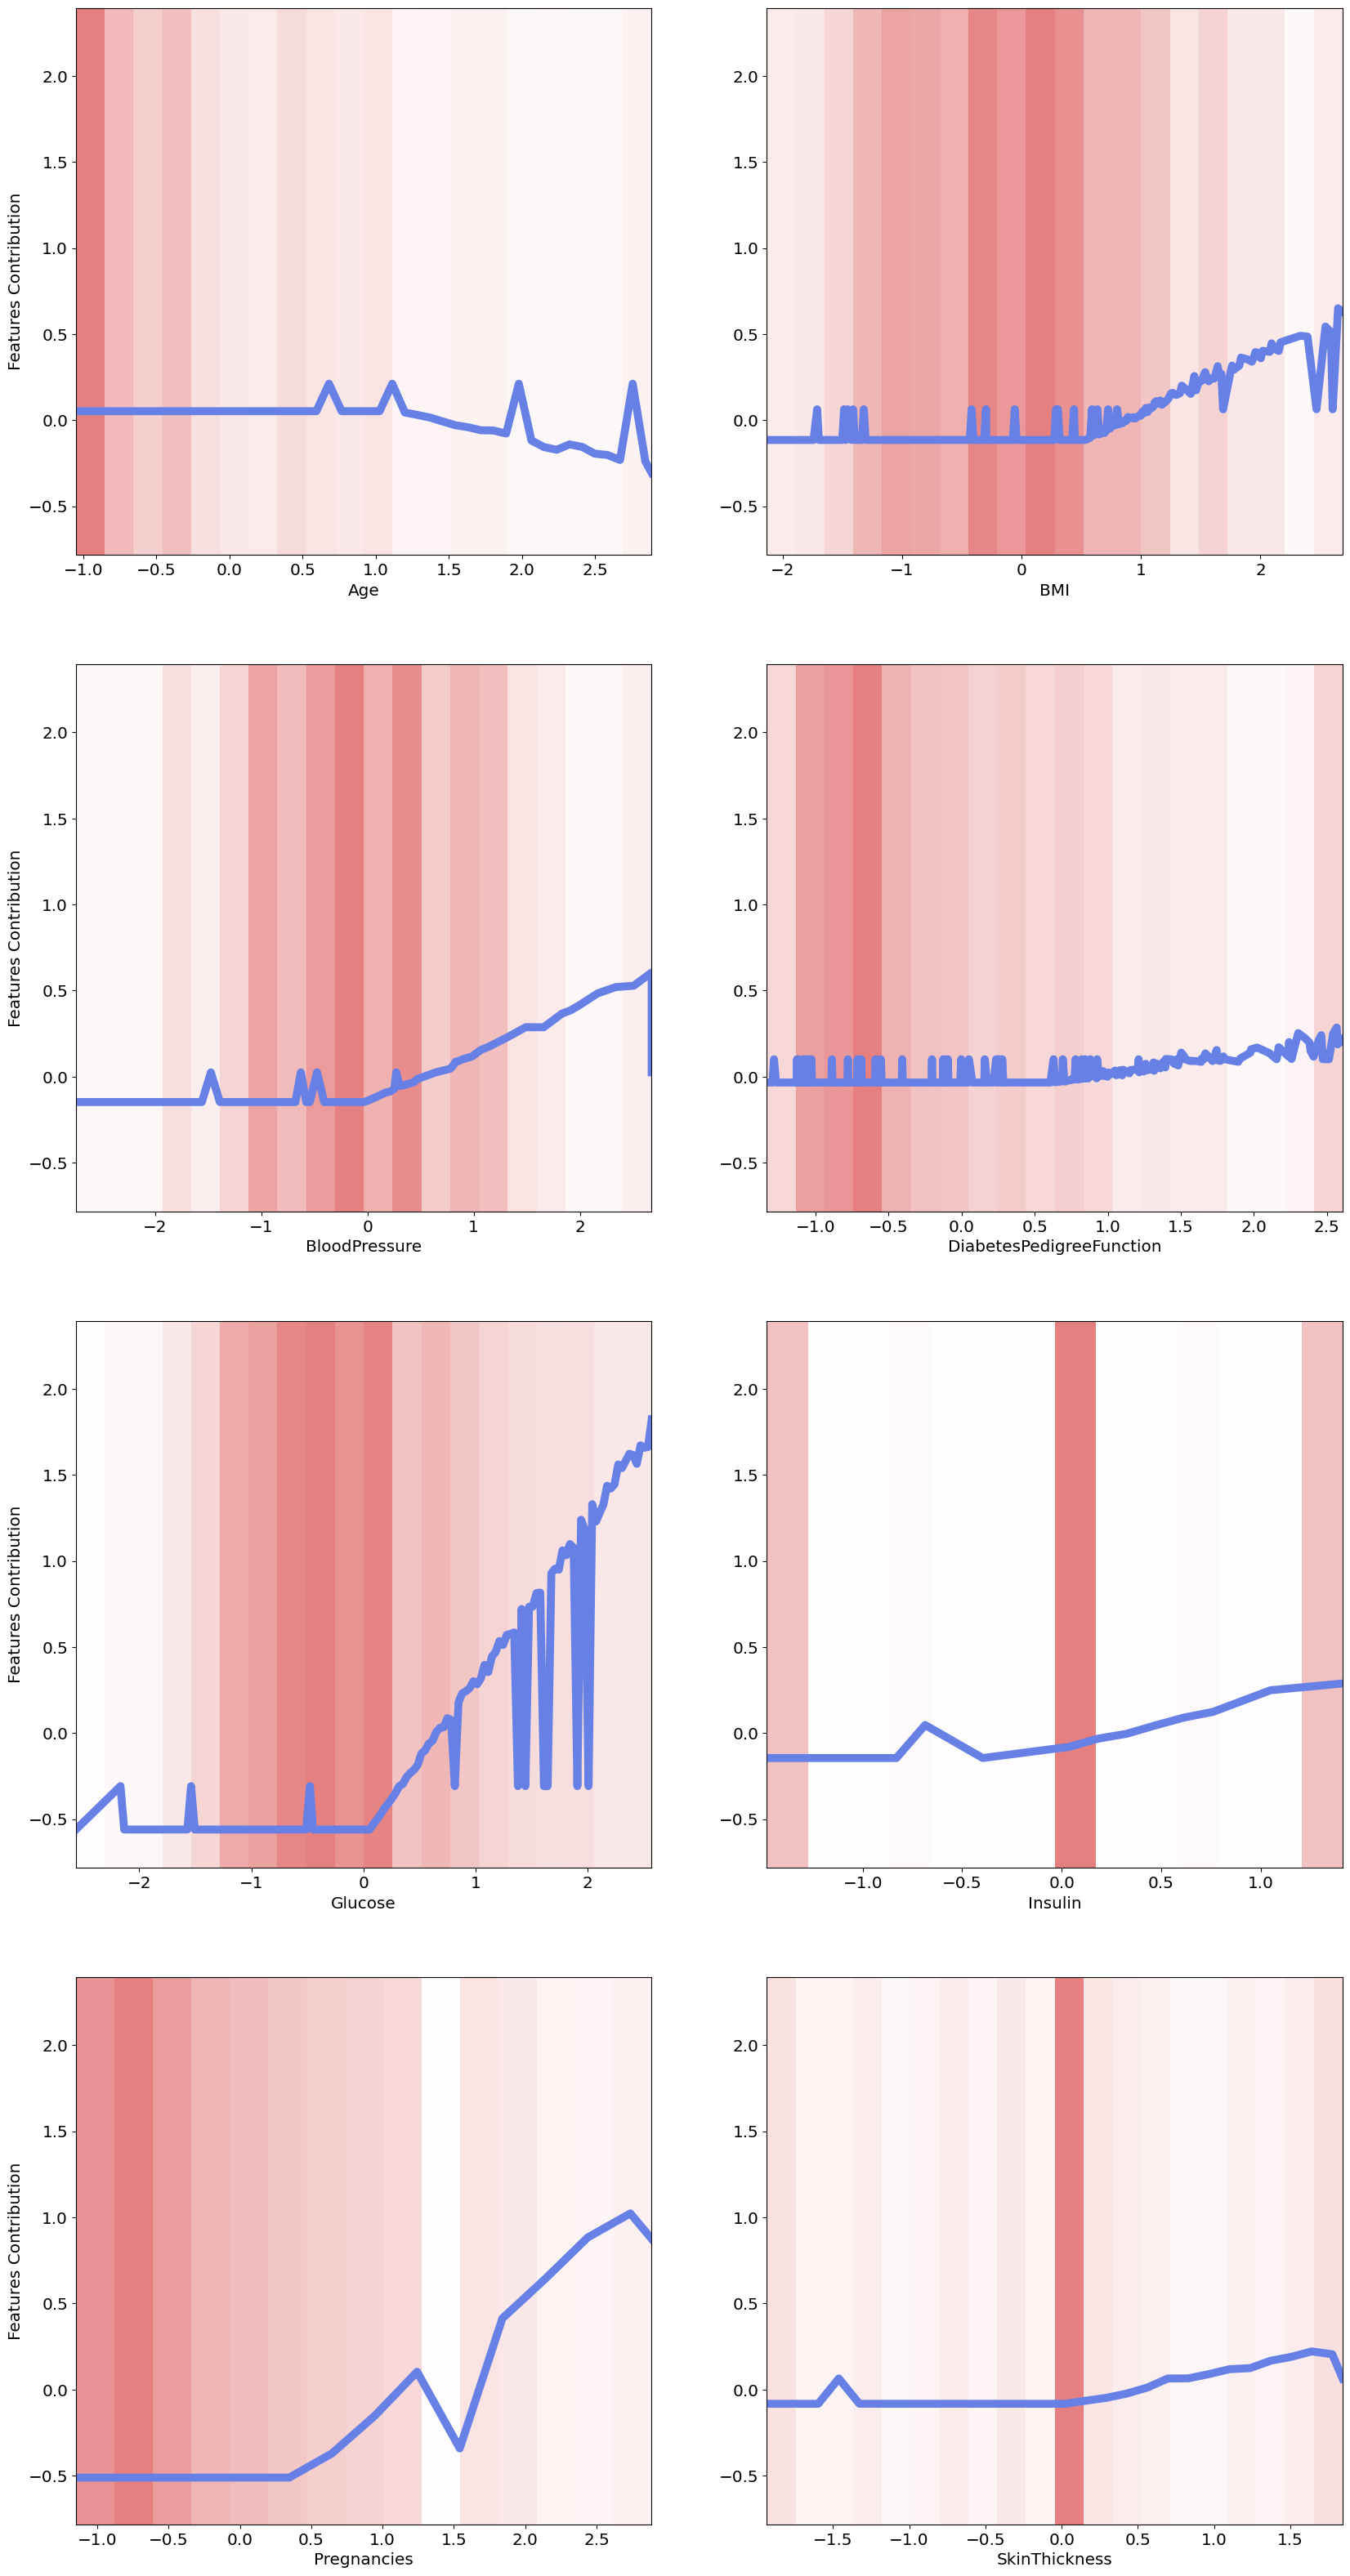

In [100]:
plot_mean_feature_importance(litmodel.model, dataset)
plot_nams(litmodel.model, dataset, num_cols=2)
plt.show()

## Interpretability with GRACE method

In [6]:
from src_grace.explain import *
from src_grace.fcn import *
from src_grace.grace import *
from src_grace.methods import NaiveGradient
from src_grace.selector import *
from src_grace.trainer import *
from src_grace.utils import *

In [8]:
def load_model(train_data):
    num_feat = train_data.getX().shape[1]
    num_class = len(np.unique(train_data.gety()))
    scaler = StandardScaler(with_std=True)
    scaler.fit(train_data.getX())
    stds = np.sqrt(scaler.var_)
    model = FCN(num_feat, num_class, [50, 30], scaler.mean_, stds)
    return model


def train():
    # load data and model
    scaler, le, _, _, features, train_data, val_data, test_data = read_data(
        'diabetes.csv', 77, scaler=0)
    model = load_model(train_data)

    # train and test the model
    trainer = Trainer(model, lrate=0.001, lr_reduce_rate=0.1)
    trainer.train(train_dataset=train_data,
                  val_dataset=val_data,
                  patience=5,
                  num_epochs=500,
                  batch_size=128)

    torch.save(model.state_dict(), "./model_grace.pt")

    _, val_acc, val_f1, val_pred = trainer.validate(val_data)
    _, test_acc, test_f1, test_pred = trainer.validate(test_data)
    print_performance(val_acc, val_f1, test_acc, test_f1)


def test():
    # load data and model
    scaler, le, _, _, features, train_data, val_data, test_data = read_data(
        'diabetes.csv', 77, scaler=0)
    model = load_model(train_data)
    model.load_state_dict(torch.load("./model_grace.pt"))
    trainer = Trainer(model)

    # configurations for generating explanation
    num_feat = train_data.getX().shape[1]
    bound_min, bound_max, bound_type = get_constraints(train_data.getX())
    alphas = 1 * \
        np.ones(num_feat) if 1 > 0 else np.std(train_data.getX(), axis=0)
    feature_selector = FeatureSelector(train_data.getX(), 0.5) if 0.5 > 0.0 else None

    avg_feat_changed, fidelity = test_grace(model,
                                            trainer,
                                            test_data.getX(),
                                            method="Naive",
                                            scaler=scaler,
                                            bound_min=bound_min,
                                            bound_max=bound_max,
                                            bound_type=bound_type,
                                            alphas=alphas,
                                            feature_selector=feature_selector)

    print_results(avg_feat_changed, fidelity)


def explain():
    # load data and model
    scaler, le, _, _, features, train_data, val_data, test_data = read_data(
        'diabetes.csv', 77, scaler=0)
    model = load_model(train_data)
    model.load_state_dict(torch.load("./model_grace.pt"))
    trainer = Trainer(model)

    # load generation model
    gen_model = NaiveGradient

    # configurations for generating explanation
    num_feat = train_data.getX().shape[1]
    bound_min, bound_max, bound_type = get_constraints(train_data.getX())
    alphas = 1 * \
        np.ones(num_feat) if 1 > 0 else np.std(train_data.getX(), axis=0)
    feature_selector = FeatureSelector(train_data.getX(), 0.5) if 0.5 > 0.0 else None

    # generate explanation on a random sample from test set    
    lb_new = lb_org = 0
    while lb_new == lb_org:
        i = np.random.choice(len(test_data.getX())) # select a random sample from test set
        x = test_data.getX()[i:i+1][0]
        x_var = Variable(torch.from_numpy(x.reshape(1,-1))).type(torch.FloatTensor)

        lb_org, lb_new, x_adv, feats_idx = generate(x_var, model, gen_model,
                                                    scaler=scaler, 
                                                    trainer=trainer,
                                                    bound_min=bound_min,
                                                    bound_max=bound_max,
                                                    bound_type=bound_type,
                                                    alphas=alphas,
                                                    feature_selector=feature_selector)

    # show explanation
    # print(features[feats_idx])
    if scaler:
        x = scaler.inverse_transform(x.reshape(1, -1))[0]
    explain_table(x, x_adv, lb_org, lb_new, feats_idx, features, 3)
    # explain_text(x, x_adv, lb_org, lb_new, feats_idx, features, units="points")


if __name__ == "__main__":
    train() # training a FCN model
    test() # test the trained model with a generation method
    explain() # explain the prediction of trained model

e:\Uni\TAI\HW2\Q1\src_grace\utils.py:108: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="backfill")


Training...
Val loss: 0.6788 Val acc: 0.5714


e:\Uni\TAI\HW2\Q1\src_grace\utils.py:108: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="backfill")


Val loss: 0.6157 Val acc: 0.6286

  Dataset     Accuracy    F1  
Validation    0.629     0.613
Test          0.688     0.688


Generating Contrastive Sample...100%


 Dataset   #avgFeatChanged   Fidelity
Test           2.948         0.740  

         sample  prediction  Glucose BloodPressure SkinThickness Pregnancies
0     Original           1  117.000        86.000        30.000       5.000
1  Contrastive           0  117.000        86.000        30.000       0.000



e:\Uni\TAI\HW2\Q1\src_grace\utils.py:108: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="backfill")
